# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from multiprocessing import Pool
import requests
from bs4 import BeautifulSoup

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

For the dataframes RansomPost and RansomKaggle I need mainly the group, date time, and target. These will help me identify the times of the year attacks are happening. I want to identify trends, in the USA based on the date time and when ransomware attacks happen. 

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: Tabular Data

Method: Method one pulling data that is in a table using the html parser for the site https://privtools.github.io/ransomposts/ This is an dynamic webpage so headers will change over time. I will need to save this as a file and work off of it from the cleaning phase on. 


Dataset variables:
*   2nd Column (This will be "Target") 	
*   3rd Column (This will be "Groups")
*   4th Column (This will be "Dates")

In [2]:
#FILL IN 1st data gathering and loading method

# URL of the webpage
url = "https://privtools.github.io/ransomposts/"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content of the webpage
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the data (if it exists)
table = soup.find('table')

if table:
    # Extract data from the table
    rows = []
    for row in table.find_all('tr'):
        rows.append([cell.get_text(strip=True) for cell in row.find_all('td')])
    
    # Convert the data to a DataFrame
    RansomPost = pd.DataFrame(rows[1:], columns=rows[0])

    # Display the DataFrame
    print( RansomPost)
else:
    print("No table found on the webpage.")

                            Palmer Construction Co., Inc      bianlian  \
0       https://www.dinamicoil.com/ #DinamicOil #TRIgona       trigona   
1                              Merchant ID <merchant.id>     ransomhub   
2                          SP Mundi <www.spmundi.com.br>     ransomhub   
3                                          www.duvel.com      stormous   
4                                            vsexshop.ru    werewolves   
...                                                  ...           ...   
10391                       Leaks from company EDP Group  ragnarlocker   
10392  Leakage from company Catania, Mahon & Rider, PLLC  ragnarlocker   
10393                   Brunner Announce – Hello World !  ragnarlocker   
10394            Leaks Company Birch Communications inc.  ragnarlocker   
10395                                        Windemuller        lorenz   

       2024-03-07 17:38:57.721906  
0      2024-03-07 15:46:58.075376  
1      2024-03-07 14:37:30.493013  
2  

In [3]:
RansomPost.head()

,"Palmer Construction Co., Inc",bianlian,2024-03-07 17:38:57.721906
0,https://www.dinamicoil.com/ #DinamicOil #TRIgona,trigona,2024-03-07 15:46:58.075376
1,Merchant ID <merchant.id>,ransomhub,2024-03-07 14:37:30.493013
2,SP Mundi <www.spmundi.com.br>,ransomhub,2024-03-07 14:37:29.544460
3,www.duvel.com,stormous,2024-03-07 11:38:37.222647
4,vsexshop.ru,werewolves,2024-03-07 16:01:06.195228


#### Dataset 2

Type: XLSX Excel

Method: Data was gather by visiting the site and manually downloading the data 

Dataset variables:

*   *Variable 1 Target 
*   *Variable 2 Sector
*   *Variable 3 Date
*   *Variable 4 Source Name

In [4]:
#FILL IN 2nd data gathering and loading method
RansomKaggle = pd.read_excel('Copy_of_Ransomware_Attacks.xlsx')
RansomKaggle.head()

,Top ransomware attacks,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Target,AKA,description,sector,organisation size,revenue,cost,ransom cost,data note,ransom paid,...,revenue as of,no of employees,Data Note,Source Name,URL,URL 2,URL 3,URL 4,URL 5,#ID
1,display label,NaN,NaN,NaN,"1,5,10,25,100,300",$USD million,display label,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kaseya,NaN,NaN,tech,300,300,70,70,NaN,unknown,...,NaN,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359
3,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358
4,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [5]:
#Optional: store the raw data in your local data store
## this needs to be freed up if you are testing but the data 
##from this point on needs to be stable and not dynamic for cleaning and testing. 


##RansomPost.to_csv('RansomPost_raw_20240305.csv', index=False)
##RansomKaggle.to_csv('RansomKaggle_raw_20240305.csv', index=False)

In [6]:
##Need to read from the files stored 
RansomPost_raw = pd.read_csv('RansomPost_raw_20240305.csv')
RansomKaggle_raw = pd.read_csv('RansomKaggle_raw_20240305.csv')

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

<Figure size 1000x600 with 0 Axes>

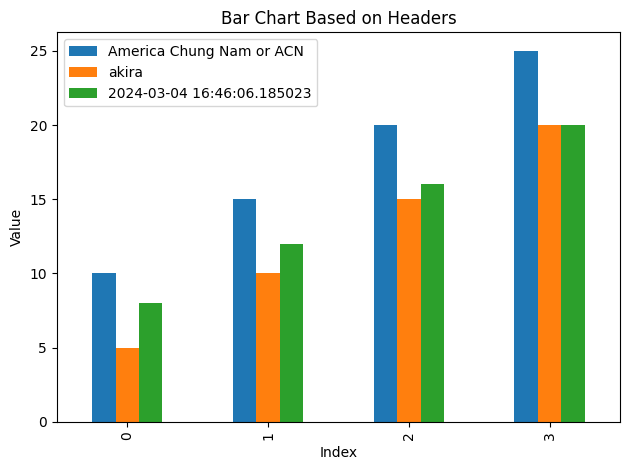

In [7]:
#FILL IN - Inspecting the dataframe visually for Ransompost

# Assuming data contains the counts for each category
data = {
    "America Chung Nam or ACN": [10, 15, 20, 25],
    "akira": [5, 10, 15, 20],
    "2024-03-04 16:46:06.185023": [8, 12, 16, 20],
}

# Convert the data into DataFrame
df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Plot bar chart
df.plot(kind='bar')
plt.title('Bar Chart Based on Headers')
plt.xlabel('Index')
plt.ylabel('Value')

# Show plot
plt.tight_layout()
plt.show()


In [8]:
#FILL IN - Inspecting the dataframe programmatically

RansomPost_raw.describe()

,"DiVal Safety Equipment, Inc.",hunters,2024-03-05 09:49:12.284418
count,10355,10355,10355
unique,10246,121,10184
top,emprint.com,lockbit3,2024-01-01 01:01:01.000000
freq,3,1625,111


Issue and justification: The Ransompost data contains incorrect column names; they should be "Target," "Group," and "Date" Additionally, there are formatting issues with the target names, such as ".com" or "(Sold)."

### Quality Issue 2:

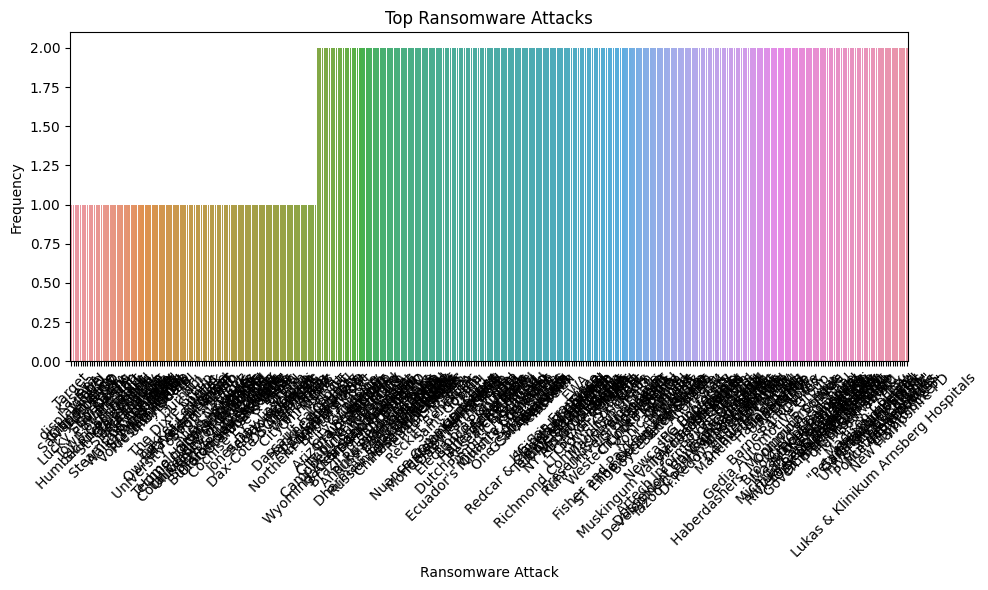

In [9]:
#FILL IN - Inspecting the dataframe visually
# Example: Create a bar plot for the top ransomware attacks
plt.figure(figsize=(10, 6))
sns.countplot(data=RansomKaggle_raw, x='Top ransomware attacks')
plt.title('Top Ransomware Attacks')
plt.xlabel('Ransomware Attack')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
#FILL IN - Inspecting the dataframe programmatically
RansomKaggle_raw.describe()

,Top ransomware attacks,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
count,614,110,323,606,614,575,614,220,51,613,...,105,83,114,1,609,255,49,5,3,613
unique,360,67,184,25,8,224,90,82,3,3,...,8,23,59,1,335,128,25,3,2,359
top,Acer,Multiple systems,American IT company,government,10,1,unknown,5,cost,unknown,...,2020-12-30 00:00:00,10000+,"stolen sensitive ministry information, emails,...",Source Name,https://www.dataprotectionreport.com/2017/05/w...,https://finance.yahoo.com/quote/FSPKF/financia...,https://www.ke.com.pk/our-company/who-we-are/,https://incfact.com/company/colonialpipeline-a...,https://finance.yahoo.com/quote/CTSH/financial...,180
freq,2,4,4,103,167,90,335,12,48,446,...,82,16,4,1,24,2,2,2,2,2


Issue and Justification: The RansomKaggle dataset contains a significant amount of empty data, and most columns are unnecessary. Column names need adjustment to eliminate "Unnamed 1-28." Row 0 should comprise all headers, and everything in row 1 should be removed. The desired information from the RansomKaggle data includes the target, sector, year, month (in datetime format), all entries with USA as the location, and the name of the ransomware groups. This streamlined approach will discard unnecessary data, facilitating trend identification during analysis.

### Tidiness Issue 1:

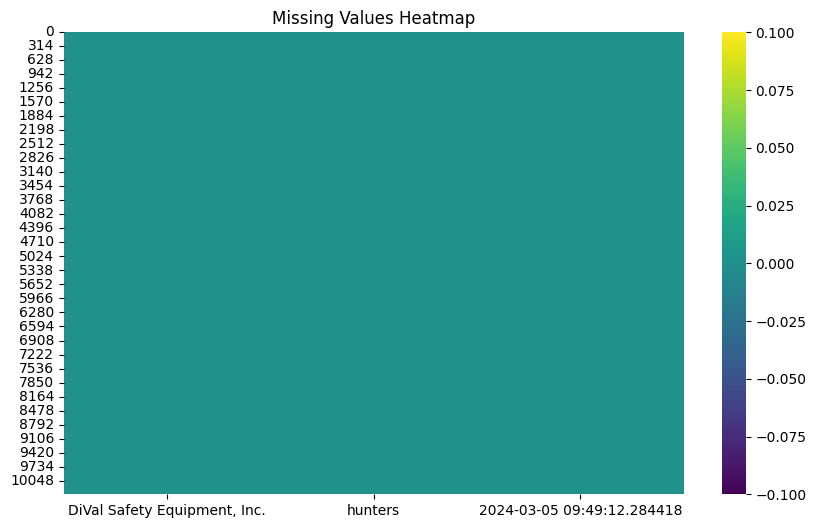

In [11]:
#FILL IN - Inspecting the dataframe visually

plt.figure(figsize=(10, 6))
sns.heatmap(RansomPost_raw.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [12]:
#FILL IN - Inspecting the dataframe programmatically

num_duplicates = RansomPost_raw.duplicated().sum()
num_duplicates

0

Issue and justification: In RansomPost we do not see any missing values or duplicates which is good. 

### Tidiness Issue 2: 

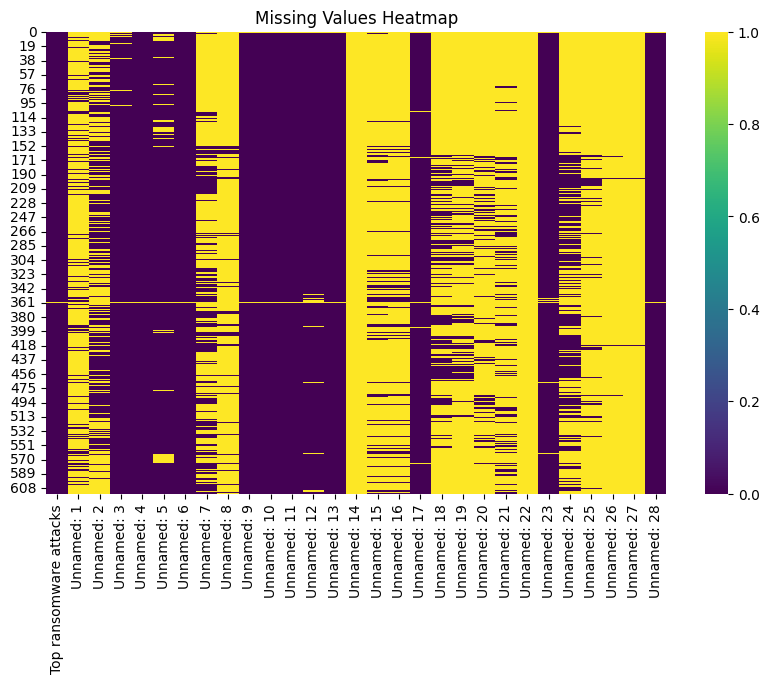

In [13]:
#FILL IN - Inspecting the dataframe visually

# Plot heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(RansomKaggle_raw.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
#FILL IN - Inspecting the dataframe programmatically

Kaggle_num_duplicates = RansomKaggle_raw.duplicated().sum()
Kaggle_num_duplicates

255

In [15]:
if Kaggle_num_duplicates > 0:
    print("Number of duplicate rows:", num_duplicates)
    print("Duplicate rows:")
    print(RansomKaggle_raw[RansomKaggle.duplicated()])

Number of duplicate rows: 0
Duplicate rows:
    Top ransomware attacks                     Unnamed: 1  \
361                    NaN                            NaN   
362          Bank of China                            NaN   
363                   CNPC  China National Petroleum Corp   
364                 Toyota                            NaN   
365                  Shell                            NaN   
..                     ...                            ...   
611    Police departments                             NaN   
612           Greece banks                            NaN   
613     Multiple law firms                            NaN   
614       New Hampshire PD                            NaN   
615          Apple devices                            NaN   

                                            Unnamed: 2  Unnamed: 3 Unnamed: 4  \
361                                                NaN         NaN        NaN   
362                                                NaN     fi

Issue and justification: In RansomKaggle we see significan empty data and 255 duplicates that we need to investigate further. 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [16]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 

#Make copy of data set to work on cleaned documents

RansomPost_cleaned = RansomPost_raw.copy()
RansomKaggle_cleaned = RansomKaggle_raw.copy()

### **Tidiness Issue 1: RansomPost (Column Names)

In [17]:
#Apply the cleaning strategy
# Renaming the columns Target, Group and Date
RansomPost_cleaned.columns = ['Target', 'Group', 'Date']  


In [18]:
#Validate the cleaning was successful
# Confirming the changes by displaying the first few rows
RansomPost_cleaned.head()

,Target,Group,Date
0,Future Generations Foundation,meow,2024-03-05 06:42:21.719281
1,se.com\$$33.5B\France\1.5TB\&lt;1%DISCLOSED\DA...,cactus,2024-03-04 22:42:04.403377
2,www.dismogas.com,stormous,2024-03-04 18:44:34.272632
3,www.everplast.com.br,stormous,2024-03-04 18:44:33.107976
4,America Chung Nam or ACN,akira,2024-03-04 16:46:06.185023


Justification: Changing the names to be more meaningful

### **Quality Issue 2: RansomPost (Inaccuracies and Missing Data)

In [19]:
#Apply the cleaning strategy

# For 'Date', it might be critical not to impute or fill, so consider dropping if date is essential
RansomPost_cleaned.dropna(subset=['Date'], inplace=True)

# If 'Target' or 'Group' can have placeholder values for missing data
RansomPost_cleaned['Target'].fillna('Unknown', inplace=True)
RansomPost_cleaned['Group'].fillna('Unknown', inplace=True)

In [20]:
#Validate the cleaning was successful
RansomPost_cleaned.head()

,Target,Group,Date
0,Future Generations Foundation,meow,2024-03-05 06:42:21.719281
1,se.com\$$33.5B\France\1.5TB\&lt;1%DISCLOSED\DA...,cactus,2024-03-04 22:42:04.403377
2,www.dismogas.com,stormous,2024-03-04 18:44:34.272632
3,www.everplast.com.br,stormous,2024-03-04 18:44:33.107976
4,America Chung Nam or ACN,akira,2024-03-04 16:46:06.185023


Justification: Dropping and filling data if there is any missing data

### **Quality Issue 3: RansomPost (Removing Duplicates if any)

In [21]:
#Apply the cleaning strategy
# Remove duplicate rows based on all three columns
RansomPost_cleaned = RansomPost_cleaned.drop_duplicates(subset=['Target', 'Group', 'Date'])

In [22]:
#Validate the cleaning was successful
RansomPost_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10355 entries, 0 to 10354
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  10355 non-null  object
 1   Group   10355 non-null  object
 2   Date    10355 non-null  object
dtypes: object(3)
memory usage: 323.6+ KB


Justification: Dropping duplicates if there are any in the data

### **Quality Issue 3: RansomPost (Standardize Date Formats)

In [23]:
#Apply the cleaning strategy
# Convert the 'Date' column to datetime format
RansomPost_cleaned['Date'] = pd.to_datetime(RansomPost_cleaned['Date'])

In [24]:
#Validate the cleaning was successful
RansomPost_cleaned.head()

,Target,Group,Date
0,Future Generations Foundation,meow,2024-03-05 06:42:21.719281
1,se.com\$$33.5B\France\1.5TB\&lt;1%DISCLOSED\DA...,cactus,2024-03-04 22:42:04.403377
2,www.dismogas.com,stormous,2024-03-04 18:44:34.272632
3,www.everplast.com.br,stormous,2024-03-04 18:44:33.107976
4,America Chung Nam or ACN,akira,2024-03-04 16:46:06.185023


Justification: Change of Date to Date time

### **Quality Issue 4: RansomPost (Removing Unnecessary Characters)

In [25]:
#Apply the cleaning strategy
# Remove "http://", "https://", and "www." from the beginning of strings in the 'Target' column
RansomPost_cleaned['Target'] = RansomPost_cleaned['Target'].str.replace(r'^(https?://)?(www\.)?', '', regex=True)

# Split the 'Target' column by '\' and select the first part
RansomPost_cleaned['Target'] = RansomPost_cleaned['Target'].str.split(r'\\', n=1).str[0]


In [26]:
#Validate the cleaning was successful
RansomPost_cleaned.head()

,Target,Group,Date
0,Future Generations Foundation,meow,2024-03-05 06:42:21.719281
1,se.com,cactus,2024-03-04 22:42:04.403377
2,dismogas.com,stormous,2024-03-04 18:44:34.272632
3,everplast.com.br,stormous,2024-03-04 18:44:33.107976
4,America Chung Nam or ACN,akira,2024-03-04 16:46:06.185023


Justification: Need to remove unnecessary Characters in the Target Collumn

### **Tidiness Issue 1: RansomKaggle (Correcting Column Names)**

In [27]:
#Apply the cleaning strategy
# Set the first row as the column names and remove the first row
RansomKaggle_cleaned.columns = RansomKaggle_cleaned.iloc[0]
RansomKaggle_cleaned = RansomKaggle_cleaned[1:]

# Reset the index
RansomKaggle_cleaned.reset_index(drop=True, inplace=True)


In [28]:
#Validate the cleaning was successful

RansomKaggle_cleaned

,Target,AKA,description,sector,organisation size,revenue,cost,ransom cost,data note,ransom paid,...,revenue as of,no of employees,Data Note,Source Name,URL,URL 2,URL 3,URL 4,URL 5,#ID
0,display label,NaN,NaN,NaN,"1,5,10,25,100,300",$USD million,display label,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaseya,NaN,NaN,tech,300,300,70,70,NaN,unknown,...,NaN,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359
2,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358
3,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357
4,City of Liege,NaN,NaN,government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Police departments,NaN,NaN,government,1,1,$300-$500 per system,5,NaN,unknown,...,NaN,NaN,added the ransom amts of attacks across 3-4 po...,NaN,https://www.reuters.com/article/us-usa-cyber-r...,https://www.darkreading.com/attacks-breaches/p...,NaN,NaN,NaN,10
611,Greece banks,NaN,NaN,finance,1,1,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.dw.com/en/greece-says-hackers-hit-...,NaN,NaN,NaN,NaN,9
612,Multiple law firms,NaN,NaN,legal,1,1,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://resources.infosecinstitute.com/topic/r...,NaN,NaN,NaN,NaN,8
613,New Hampshire PD,NaN,NaN,government,1,1,$2000-$3000,0.003,cost,unknown,...,NaN,NaN,repair costs were $2000-$3000,NaN,https://www.nbcnews.com/tech/security/virus-wi...,NaN,NaN,NaN,NaN,4


Justification: Moved the first row up as the data was inputting filler information for the Column names

### **Tidiness Issue 2: RansomKaggle (remove Column 0)

In [29]:
#Apply the cleaning strategy
RansomKaggle_cleaned = RansomKaggle_cleaned.drop(0)

In [30]:
#Validate the cleaning was successful
RansomKaggle_cleaned

,Target,AKA,description,sector,organisation size,revenue,cost,ransom cost,data note,ransom paid,...,revenue as of,no of employees,Data Note,Source Name,URL,URL 2,URL 3,URL 4,URL 5,#ID
1,Kaseya,NaN,NaN,tech,300,300,70,70,NaN,unknown,...,NaN,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359
2,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358
3,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357
4,City of Liege,NaN,NaN,government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN,356
5,Lucky Star Casino,NaN,NaN,NaN,1,8.5,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.casino.org/news/lucky-star-casinos...,NaN,NaN,NaN,NaN,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Police departments,NaN,NaN,government,1,1,$300-$500 per system,5,NaN,unknown,...,NaN,NaN,added the ransom amts of attacks across 3-4 po...,NaN,https://www.reuters.com/article/us-usa-cyber-r...,https://www.darkreading.com/attacks-breaches/p...,NaN,NaN,NaN,10
611,Greece banks,NaN,NaN,finance,1,1,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.dw.com/en/greece-says-hackers-hit-...,NaN,NaN,NaN,NaN,9
612,Multiple law firms,NaN,NaN,legal,1,1,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://resources.infosecinstitute.com/topic/r...,NaN,NaN,NaN,NaN,8
613,New Hampshire PD,NaN,NaN,government,1,1,$2000-$3000,0.003,cost,unknown,...,NaN,NaN,repair costs were $2000-$3000,NaN,https://www.nbcnews.com/tech/security/virus-wi...,NaN,NaN,NaN,NaN,4


Justification: Dropped row 0 as it had no pertinent information

### **Tidiness Issue 3: RansomKaggle (Standardize Names of Columns)

In [31]:
#Apply the cleaning strategy

# Clean up column names
RansomKaggle_cleaned.columns = RansomKaggle_cleaned.columns.str.strip()  # Remove leading/trailing spaces
RansomKaggle_cleaned.columns = RansomKaggle_cleaned.columns.str.replace('[^a-zA-Z0-9]', '_')  # Replace special characters with underscores
RansomKaggle_cleaned.columns = RansomKaggle_cleaned.columns.str.title()  # Capitalize the first letter of each word



/tmp/ipykernel_147/362195141.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  RansomKaggle_cleaned.columns = RansomKaggle_cleaned.columns.str.replace('[^a-zA-Z0-9]', '_')  # Replace special characters with underscores


In [32]:
#Validate the cleaning was successful
RansomKaggle_cleaned.head()

,Target,Aka,Description,Sector,Organisation_Size,Revenue,Cost,Ransom_Cost,Data_Note,Ransom_Paid,...,Revenue_As_Of,No_Of_Employees,Data_Note,Source_Name,Url,Url_2,Url_3,Url_4,Url_5,_Id
1,Kaseya,NaN,NaN,tech,300,300,70,70,NaN,unknown,...,NaN,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359
2,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358
3,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357
4,City of Liege,NaN,NaN,government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN,356
5,Lucky Star Casino,NaN,NaN,NaN,1,8.5,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,https://www.casino.org/news/lucky-star-casinos...,NaN,NaN,NaN,NaN,355


Justification: Fix all the column names to be uniform with capital letters first then any space to be filled in with an underscore in order to make it more python readable. 

### **Tidiness Issue 5: RansomKaggle (Date Format Change to match RansomPost)

In [33]:
#Apply the cleaning strategy
# Combine 'YEAR' and 'month' columns into a new 'Date' column
RansomKaggle_cleaned['Date'] = RansomKaggle_cleaned['Year'].astype(str) + '-' + RansomKaggle_cleaned['Month'].str[:3]

# Map month abbreviations to corresponding numerical values
month_map = {
    'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04',
    'MAY': '05', 'JUN': '06', 'JUL': '07', 'AUG': '08',
    'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'
}
RansomKaggle_cleaned['Date'] = RansomKaggle_cleaned['Date'].str[:4] + '-' + RansomKaggle_cleaned['Date'].str[5:].map(month_map)

# Convert 'Date' column to datetime format
RansomKaggle_cleaned['Date'] = pd.to_datetime(RansomKaggle_cleaned['Date'], format='%Y-%m')

# Drop the original 'YEAR' and 'month' columns
RansomKaggle_cleaned.drop(['Year', 'Month'], axis=1, inplace=True)

In [34]:
#Validate the cleaning was successful
RansomKaggle_cleaned.columns.tolist()

['Target',
 'Aka',
 'Description',
 'Sector',
 'Organisation_Size',
 'Revenue',
 'Cost',
 'Ransom_Cost',
 'Data_Note',
 'Ransom_Paid',
 'Year_Code',
 'Location',
 'Interesting_Story__Edited_',
 'Interesting_Story__Long_',
 'Interesting_Story_',
 'Ransomware',
 'Stock_Symbol',
 'Revenue_As_Of',
 'No_Of_Employees',
 'Data_Note',
 'Source_Name',
 'Url',
 'Url_2',
 'Url_3',
 'Url_4',
 'Url_5',
 '_Id',
 'Date']

In [35]:
RansomKaggle_cleaned.head()

,Target,Aka,Description,Sector,Organisation_Size,Revenue,Cost,Ransom_Cost,Data_Note,Ransom_Paid,...,No_Of_Employees,Data_Note,Source_Name,Url,Url_2,Url_3,Url_4,Url_5,_Id,Date
1,Kaseya,NaN,NaN,tech,300,300,70,70,NaN,unknown,...,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359,2021-07-01
2,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358,2021-06-01
3,Grupo Fleury,NaN,Brazil's largest diagnostic company,healthcare,10,686,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357,2021-06-01
4,City of Liege,NaN,NaN,government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN,356,2021-06-01
5,Lucky Star Casino,NaN,NaN,NaN,1,8.5,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,https://www.casino.org/news/lucky-star-casinos...,NaN,NaN,NaN,NaN,355,2021-06-01


Justification: Combining the Year and Month column to be date and identify the date to be similar to the RansomPost data

In [36]:
RansomKaggle_cleaned.dtypes

0
Target                                object
Aka                                   object
Description                           object
Sector                                object
Organisation_Size                     object
Revenue                               object
Cost                                  object
Ransom_Cost                           object
Data_Note                             object
Ransom_Paid                           object
Year_Code                             object
Location                              object
Interesting_Story__Edited_            object
Interesting_Story__Long_              object
Interesting_Story_                    object
Ransomware                            object
Stock_Symbol                          object
Revenue_As_Of                         object
No_Of_Employees                       object
Data_Note                             object
Source_Name                           object
Url                                   object
Url_2   

### **Tidiness Issue 6: RansomKaggle (Fix Sector Names to be Titles)

In [37]:
#Apply the cleaning strategy
RansomKaggle_cleaned['Sector'] = RansomKaggle_cleaned['Sector'].str.title()

In [38]:
#Validate the cleaning was successful
RansomKaggle_cleaned.head()

,Target,Aka,Description,Sector,Organisation_Size,Revenue,Cost,Ransom_Cost,Data_Note,Ransom_Paid,...,No_Of_Employees,Data_Note,Source_Name,Url,Url_2,Url_3,Url_4,Url_5,_Id,Date
1,Kaseya,NaN,NaN,Tech,300,300,70,70,NaN,unknown,...,NaN,NaN,NaN,https://techcrunch.com/2021/07/05/kaseya-hack-...,NaN,NaN,NaN,NaN,359,2021-07-01
2,Salvation Army,NaN,NaN,NaN,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,https://www.teiss.co.uk/salvation-army-ransomw...,NaN,NaN,NaN,NaN,358,2021-06-01
3,Grupo Fleury,NaN,Brazil's largest diagnostic company,Healthcare,10,686,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,https://www.bleepingcomputer.com/news/security...,NaN,NaN,NaN,NaN,357,2021-06-01
4,City of Liege,NaN,NaN,Government,1,NaN,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,https://securityaffairs.co/wordpress/119240/ma...,NaN,NaN,NaN,NaN,356,2021-06-01
5,Lucky Star Casino,NaN,NaN,NaN,1,8.5,unknown,NaN,NaN,unknown,...,NaN,NaN,NaN,https://www.casino.org/news/lucky-star-casinos...,NaN,NaN,NaN,NaN,355,2021-06-01


Justification: Sector had some lowercase names so I made them titles

### **Tidiness Issue 7: RansomKaggle Column RansomWare change to Group**

In [39]:
#Apply the cleaning strategy
RansomKaggle_cleaned.rename(columns={'Ransomware': 'Group'}, inplace=True)

In [40]:
#Validate the cleaning was successful
RansomKaggle_cleaned.columns.tolist()

['Target',
 'Aka',
 'Description',
 'Sector',
 'Organisation_Size',
 'Revenue',
 'Cost',
 'Ransom_Cost',
 'Data_Note',
 'Ransom_Paid',
 'Year_Code',
 'Location',
 'Interesting_Story__Edited_',
 'Interesting_Story__Long_',
 'Interesting_Story_',
 'Group',
 'Stock_Symbol',
 'Revenue_As_Of',
 'No_Of_Employees',
 'Data_Note',
 'Source_Name',
 'Url',
 'Url_2',
 'Url_3',
 'Url_4',
 'Url_5',
 '_Id',
 'Date']

Justification: Changed the name of Ransomware to Group to be uniform with RansomPost data

### **Quality Issue 1: RansomKaggle (Remove Rows with Empty data in Target Column)

In [41]:
#Apply the cleaning strategy
RansomKaggle_cleaned = RansomKaggle_cleaned.dropna(subset=['Target'])

# Reset the index after removing rows
RansomKaggle_cleaned.reset_index(drop=True, inplace=True)

In [42]:
#Validate the cleaning was successful
missing_data_target = RansomKaggle_cleaned['Target'].isnull().sum()

print("Number of missing values in the 'Target' column:", missing_data_target)

Number of missing values in the 'Target' column: 0


Justification: dropping empty data and confirming they have been removed from the Target column

### **Quality Issue 2: RansomKaggle (Remove Duplicate Rows)

In [43]:
#Apply the cleaning strategy
# Remove completely duplicate rows
RansomKaggle_cleaned.drop_duplicates(inplace=True)

/tmp/ipykernel_147/3136315073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RansomKaggle_cleaned.drop_duplicates(inplace=True)


In [44]:
#Validate the cleaning was successful
RansomKaggle_cleaned.shape

(358, 28)

Justification: Dropping duplicated to strengthen data quality

### **Quality Issue 3: RansomKaggle and RansomPost Date/time should be the same 

In [45]:
#Apply the cleaning strategy
# Fixing data types for RansomKaggle_cleaned_1.csv
RansomKaggle_cleaned['Date'] = pd.to_datetime(RansomKaggle_cleaned['Date'])

# For RansomPost_cleaned_1.csv, ensuring 'Date' is datetime
RansomPost_cleaned['Date'] = pd.to_datetime(RansomPost_cleaned['Date'])

/tmp/ipykernel_147/4149490752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RansomKaggle_cleaned['Date'] = pd.to_datetime(RansomKaggle_cleaned['Date'])


In [46]:
#Validate the cleaning was successful
RansomKaggle_cleaned.dtypes

0
Target                                object
Aka                                   object
Description                           object
Sector                                object
Organisation_Size                     object
Revenue                               object
Cost                                  object
Ransom_Cost                           object
Data_Note                             object
Ransom_Paid                           object
Year_Code                             object
Location                              object
Interesting_Story__Edited_            object
Interesting_Story__Long_              object
Interesting_Story_                    object
Group                                 object
Stock_Symbol                          object
Revenue_As_Of                         object
No_Of_Employees                       object
Data_Note                             object
Source_Name                           object
Url                                   object
Url_2   

In [47]:
RansomPost_cleaned.dtypes

Target            object
Group             object
Date      datetime64[ns]
dtype: object

Justification: Need uniformity between both Date columns for each data set in order to do timeline analysis

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [48]:
#FILL IN - Remove unnecessary variables and combine datasets
#Apply the cleaning strategy
# Updated list of columns to drop
columns_to_drop = ['Aka', 'Data_Note', 'Data_Note.1', 'Interesting_Story__Edited_', 
                   'Interesting_Story__Long_', 'Revenue', 'Ransom_Cost', 'Ransom_Paid', 
                   'Interesting_Story_', 'Url', 'Url_2', 'Source_Name', 'Year_Code', 'Cost',
                   'Url_3', 'Url_4', 'Url_5', 'Stock_Symbol', '_Id' 'Revenue_As_Of']

# Only keep columns to drop that actually exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in RansomKaggle_cleaned.columns]

# Drop the specified columns safely
RansomKaggle_cleaned = RansomKaggle_cleaned.drop(columns=columns_to_drop, axis=1)

# Check the DataFrame to confirm changes
print(RansomKaggle_cleaned.columns)


Index(['Target', 'Description', 'Sector', 'Organisation_Size', 'Location',
       'Group', 'Revenue_As_Of', 'No_Of_Employees', '_Id', 'Date'],
      dtype='object', name=0)


In [49]:
common_columns = ['Target', 'Group', 'Date']  

#Dataframes that have the same columns 
ransompost_cleaned_Final = RansomPost_cleaned[common_columns]
RansomKaggle_cleaned_Final = RansomKaggle_cleaned[common_columns]

# Concatenate the datasets
Combined_df = pd.concat([ransompost_cleaned_Final, RansomKaggle_cleaned_Final], axis=0)

# Check the combined dataset
Combined_df.head()

,Target,Group,Date
0,Future Generations Foundation,meow,2024-03-05 06:42:21.719281
1,se.com,cactus,2024-03-04 22:42:04.403377
2,dismogas.com,stormous,2024-03-04 18:44:34.272632
3,everplast.com.br,stormous,2024-03-04 18:44:33.107976
4,America Chung Nam or ACN,akira,2024-03-04 16:46:06.185023


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [50]:
#FILL IN - saving data

file_path = "Combined_Data_Final.csv"

# Save the combined DataFrame to a CSV file
Combined_df.to_csv(file_path, index=False)

# Print a message confirming that the file has been saved
file_path

'Combined_Data_Final.csv'

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* What is the trend of ransomware attacks over the past 10 years?

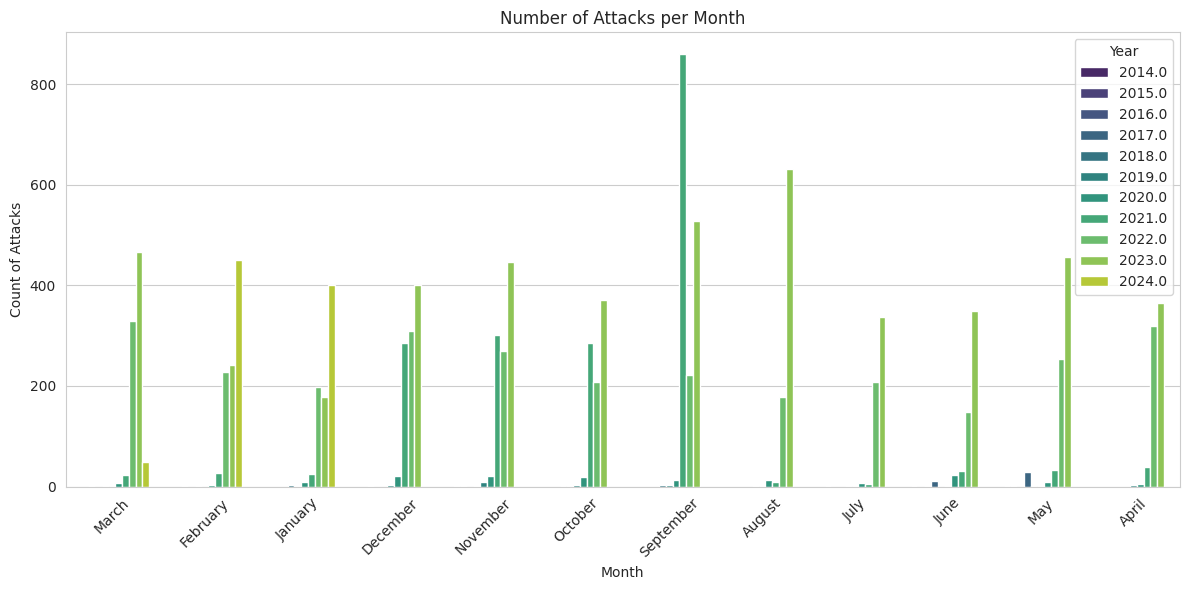

In [52]:
#Visual 1 - FILL IN
# Extract year and month from the Date column
Combined_df['Year'] = Combined_df['Date'].dt.year
Combined_df['Month'] = Combined_df['Date'].dt.month_name()

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the count of attacks per month
plt.figure(figsize=(12, 6))
sns.countplot(data=Combined_df, x='Month', hue='Year', palette='viridis')
plt.title('Number of Attacks per Month')
plt.xlabel('Month')
plt.ylabel('Count of Attacks')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.legend(title='Year')
plt.show()

*Answer to research question:* Cyber attacks have increase over the years due to increase cyber capabilities and more than likely the free time that has been available since COVID as indicated by the spike in activity in 2020 forward. 

*Research question: What cyber groups are the most prevalent?

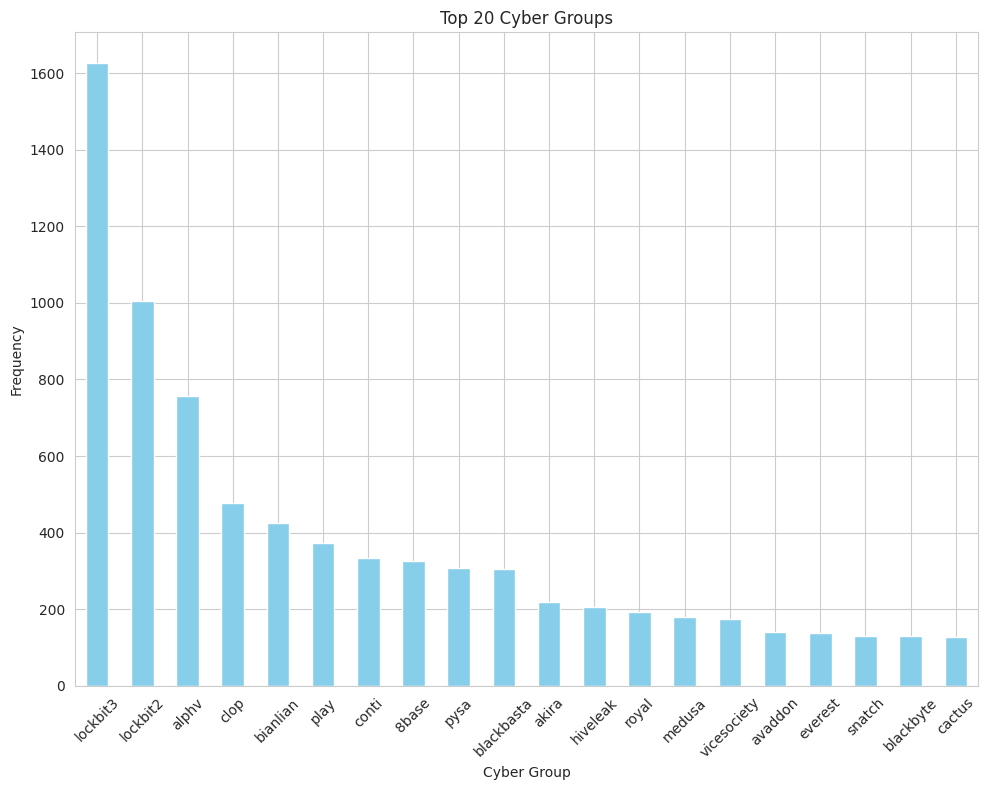

In [53]:
# Get the top 20 most common cyber groups
top_groups = Combined_df['Group'].value_counts().head(20)

# Plot the top 20 cyber groups
plt.figure(figsize=(10, 8))
top_groups.plot(kind='bar', color='skyblue')
plt.title('Top 20 Cyber Groups')
plt.xlabel('Cyber Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Answer to research question: The Most prevalent cyber group is Lockbit as their frequency is the highest. 

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time I would meticulously go over the data and single out the domains and identify which ones are from which location in the RansomPost data and create a new column based on the suffixes of the domains. Then I would look at the comparison of location. Structural issues would be all the empty data in RansomKaggle which caused a lot of cleaning even for a Kaggle site dataset. If information on cyber attacks weren't paywalled I would have been able to come up with more valueable insight. 